![Futuristic electric car charging](IMG_8807.png)

The US Government's Alternative Fuels Data Center collects records of electric vehicle (EV) charging infrastructure, including charging ports and station locations, as well as sales of electric vehicles. With the EV market rapidly evolving, it's essential to understand the growth trends in charging facilities and sales to inform strategic planning. As a data scientist working for a leading EV charging network operator, you recognize the potential in this data and start wrangling and visualizing the aggregated yearly data. 

This yearly data captured in December of each year encompasses a record of EV charging port installations and station localities spanning roughly ten years, capturing both public and private charging environments. The data is stored in two CSV files:
___

`private_ev_charging.csv`

| Variable   | Description                                          |
|------------|------------------------------------------------------|
| `year` |  Year of data collection |
| `private_ports`| The number of available charging ports owned by private companies in a given year  |
| `private_station_locations`   | The number of privately owned station locations for EV charging

___

`public_ev_charging.csv`
 
| Variable   | Description                                          |
|------------|------------------------------------------------------|
| `year` |  Year of data collection  |
| `public_ports`| The number of available charging ports under public ownership in a given year  |
| `public_station_locations`   | The number of publicly owned station locations for EV charging

___

The sales information is available for each model and year in the `ev_sales.csv` file:

| Variable   | Description                                          |
|------------|------------------------------------------------------|
| `Vehicle` |  Electric vehicle model |
| `year`| Year of data collection |
| `sales`   | The number of vehicles sold in the US

In [410]:
# Import required packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the "private_ev_charging.csv", "public_ev_charging.csv" and "ev_sales.csv" CSV files as pandas DataFrames and store them in the private_ev_df, public_ev_df and ev_sales_df variables respectively
private_ev_df = pd.read_csv("private_ev_charging.csv")
public_ev_df = pd.read_csv("public_ev_charging.csv")
ev_sales_df = pd.read_csv("ev_sales.csv")

In [411]:
# Print the summary and the head of the private_ev_df DataFrame
print(private_ev_df.info(), "\n", private_ev_df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 3 columns):
 #   Column                     Non-Null Count  Dtype
---  ------                     --------------  -----
 0   year                       9 non-null      int64
 1   private_ports              9 non-null      int64
 2   private_station_locations  9 non-null      int64
dtypes: int64(3)
memory usage: 344.0 bytes
None 
    year  private_ports  private_station_locations
0  2014           3695                       1825
1  2015           4150                       1962
2  2016           5763                       2331
3  2017           6048                       2370
4  2018           6812                       2489


In [412]:
# Print the summary and the head of the public_ev_df DataFrame
print(public_ev_df.info(), "\n", public_ev_df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 3 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   year                      10 non-null     int64
 1   public_ports              10 non-null     int64
 2   public_station_locations  10 non-null     int64
dtypes: int64(3)
memory usage: 368.0 bytes
None 
    year  public_ports  public_station_locations
0  2013         16619                      6938
1  2014         22470                      9207
2  2015         26532                     10710
3  2016         33165                     13150
4  2017         45789                     16170


In [413]:
# Print the summary and the head of the ev_sales_df DataFrame
print(ev_sales_df.info(), "\n", ev_sales_df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 495 entries, 0 to 494
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Vehicle  495 non-null    object 
 1   year     495 non-null    int64  
 2   sales    241 non-null    float64
dtypes: float64(1), int64(1), object(1)
memory usage: 11.7+ KB
None 
       Vehicle  year    sales
0  Chevy Volt  2011   7671.0
1  Chevy Volt  2012  23461.0
2  Chevy Volt  2013  23094.0
3  Chevy Volt  2014  18805.0
4  Chevy Volt  2015  15393.0


In [414]:
# Join the private_ev_df and public_ev_df DataFrames on the "year" column, and store the resulting DataFrame in the df_temp variable
df_combined = pd.merge(public_ev_df, private_ev_df, on = "year", how = "outer", indicator = True)
df_temp = df_combined[df_combined["_merge"] == "both"].drop(columns = ["_merge"])

# Print the head of the df_temp DataFrame
print(df_temp.head())

   year  public_ports  ...  private_ports  private_station_locations
1  2014         22470  ...         3695.0                     1825.0
2  2015         26532  ...         4150.0                     1962.0
3  2016         33165  ...         5763.0                     2331.0
4  2017         45789  ...         6048.0                     2370.0
5  2018         56842  ...         6812.0                     2489.0

[5 rows x 5 columns]


In [415]:
# Group the ev_sales DataFrame by year and aggregate on the "sales" column using the "sum" function to determine the total number of vehicles sold each year and store the resulting DataFrame in the ev_total_sales_per_year variable
ev_total_sales_per_year = ev_sales_df.groupby("year")["sales"].sum().reset_index()

# Print the head of the ev_total_sales_per_year DataFrame
print(ev_total_sales_per_year.head())

   year     sales
0  2011   17763.0
1  2012   53171.0
2  2013   97102.0
3  2014  118882.0
4  2015  114023.0


In [416]:
# Join the df_temp and the ev_total_sales_per_year DataFrames on the "year" columns, drop any null values and assign the resulting DataFrame to the df_complete variable
df_complete = pd.merge(df_temp, ev_total_sales_per_year, on = "year", how = "left")
df_complete = df_complete.dropna(subset = "sales")

# Print the head of the df_complete DataFrame
df_complete

,year,public_ports,public_station_locations,private_ports,private_station_locations,sales
0,2014,22470,9207,3695.0,1825.0,118882.0
1,2015,26532,10710,4150.0,1962.0,114023.0
2,2016,33165,13150,5763.0,2331.0,159616.0
3,2017,45789,16170,6048.0,2370.0,195581.0
4,2018,56842,19893,6812.0,2489.0,361315.0
5,2019,73838,23282,9955.0,3078.0,326644.0


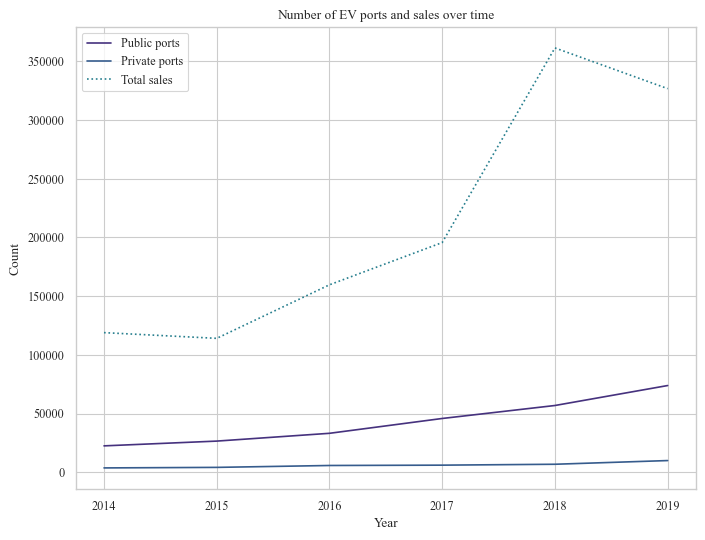

In [417]:
# Set the general style of the plots
sns.set_theme(style = "whitegrid", font = "Times New Roman", palette = "viridis", context = "paper")

# Create a scatterplot showing the trends in public ports and private ports relative to sales, and store the results in the (fig, ax) ordered pair of variables
fig, ax = plt.subplots(figsize = (8,6))
sns.lineplot(data = df_complete, x = "year", y = "public_ports", label = "Public ports")
sns.lineplot(data = df_complete, x = "year", y = "private_ports", label = "Private ports")
sns.lineplot(data = df_complete, x = "year", y = "sales", label = "Total sales", linestyle = ":")
ax.legend(loc = "upper left")
ax.set(xlabel = "Year", ylabel = "Count", title = "Number of EV ports and sales over time")
plt.show()

In [418]:
# Given that higher numbers of sales generally lead to more "public" or "private" charging ports, store the "Yes." string to the solution variable
solution = "public"

# Print the solution variable as an answer to its associated question:
print(f"""Does increased electric vehicle sales lead to more "public" or "private" charging ports? {str.capitalize(solution)}.""")

Does increased electric vehicle sales lead to more "public" or "private" charging ports? Public.
